In [1]:
#part a

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random

In [17]:
#initialization base case for variables
M = 1e11 #mass of the sun in geometric units
G = 1 # gravitational constant is 1 in geometrical units
a = 1.5 #stays the same in geometrical units

In [18]:
'''
space_density: Density equation and return 
inputs: r: float array; radii
outputs: p: float array; densities
'''
def space_density(r):
    p = (3*M/(4*np.pi*(a**3)))*((1+((r/a)**2))**(-5/2))
    return p

In [66]:
'''
potential: potential equation and return 
inputs: r: float array; radii
outputs: phi: float array; potentials
'''
def potential(r): #potential equation and return
    phi = (-M/a)/(np.sqrt(r**2+1))
    return phi

In [20]:
'''
energy: potential energy equation and return \
inputs: none
outputs: W: float array; potential energies
'''
def energy():
    W = -(3*np.pi/64)*G*(M**2)/a
    return W

In [21]:
'''
radius: radius calculation and return 
inputs: X1: float array; randomly generated numbers between 0 and 1
outputs: r: float array; radii
'''
def radius(X):
    r = ((X1**(-2/3))-1)**(-1/2)
    return r

In [22]:
'''
xyz: component calculation and return. this can be used for 
velocities and distances
inputs: X2: float array; randomly generated numbers between 0 and 1
X3: float array; randomly generated numbers between 0 and 1
r: float array; radii
outputs: x: float array; x components of the X2 array
y: float array; y components of the X2 array
z: float array; z components of the X2 array
'''
def xyz(X2, X3, r):
    z = (1-(2*X2))*r
    x = ((r**2-z**2)**1/2)*np.cos(2*np.pi*X3)
    y = ((r**2-z**2)**1/2)*np.sin(2*np.pi*X3)
    return x, y, z

In [33]:
'''
max_velocity: maximum velocity calculation  and return 
inputs: r: float array; radii
outputs: v: float array; maximum velocities for different arrays
'''
def max_velocity(r):
    v = np.sqrt(2)*((1+r**2)**(-1/4))
    return v

In [41]:
'''
prob_dis: probability distrbution calculation  and return. this essentially
means that this piece of code compares two arays of random numbers, x4 and x5
to ensure that g(x4)>0.1x5, if it finds a value for which this isn't true, then
it replaces it with a new random number until it does fulfill those conditions
inputs: X4: float array; randomly generated numbers between 0 and 1
X5: float array; randomly generated numbers between 0 and 1
outputs: X4: float array; randomly generated numbers between 0 and 1 that obeys
g(x4)>0.1x5
'''
def prob_dis(X4, X5):
    g = (X4**2)*((1-X4**2)**(7/2))
    for j in range(len(X4)):
        g = (X4[j]**2)*((1-X4[j]**2)**(7/2))
        while 0.1*X5[j] > g: #discards both arrays if g(X4) is less 
            X4[j] = random.rand(1)
            X5[j] = random.rand(1)
            g = (X4[j]**2)*((1-X4[j]**2)**(7/2))
    return X4

In [42]:
#Part a

In [43]:
#random variable computation
X1 = random.rand(100000)
X2 = random.rand(100000)
X3 = random.rand(100000)
X4 = random.rand(100000)
X5 = random.rand(100000)
X6 = random.rand(100000)
X7 = random.rand(100000)

In [44]:
#variable computation
r = radius(X1) #computation of the radius for a number of random variables
x, y, z = xyz(X2, X3, r) #computation of the x,y,+z, components of the radius
ve = max_velocity(r) #maximum velocity at different radiuses.
q = prob_dis(X4, X5) #prbability distribution array following guidelines
v = q*ve #calculates v for every radius using q and max velocity
w, u, v = xyz(X6, X7, v) #x, y, and z components of velocity
E = energy() #computation of energy

In [45]:
#scaling of x y and z components to the right values


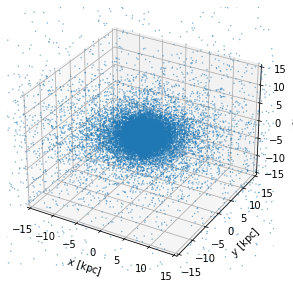

In [46]:
#tentitive plotting of velocities in 3d.
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, s=0.1)
ax.set_xlabel(r'$x$ [kpc]')
ax.set_ylabel(r'$y$ [kpc]')
ax.set_zlabel(r'$z$ [kpc]')
ax.set_xlim(-10*a, 10*a)
ax.set_ylim(-10*a, 10*a)
ax.set_zlim(-10*a, 10*a)
plt.tight_layout()
plt.show()

In [53]:
#output of all results
f = open("results.txt", "w")
for i in range(len(x)):
    f.write("%6.3f %6.3f %6.3f %20.7f %20.7f %20.7f"%(x[i], y[i], z[i], w[i], u[i], v[i]))
f.close()

In [54]:
#part b

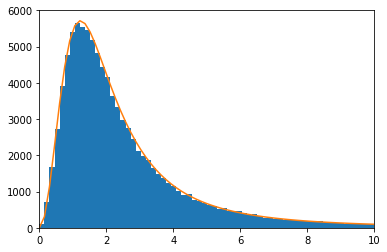

In [71]:
#histogram plotting and computation of density based on it's radius
bins = np.linspace(0, 10, 100) * a
P = 4*np.pi*bins**2*space_density(bins)

fig = plt.figure()

plt.hist(r*a, bins = bins)
plt.plot(bins, 100000*P/np.sum(P))
plt.xlim(0, 10)

plt.show()

In [58]:
#part c

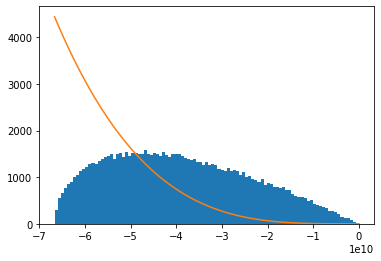

In [69]:
'''histogram plotting and computation of energy based on it's radius
as well as plotting of the line of the analytic energy solution'''
E = (1/2)*((v*5.477e-7)**2) + potential(r)
bins = np.linspace(-1, 0, 100) * (M/a)
f = (24*np.sqrt(2)/(7*np.pi**3))*(a**2/M**4)*(-bins)**(7/2)

plt.hist(E, bins = bins)
plt.plot(bins, 100000*f/np.sum(f))
plt.show()